In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [13]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.columns= customer_df.columns.str.strip().str.lower()
customer_df.columns = customer_df.columns.str.replace(' ', '_')
categoricals = customer_df.select_dtypes(object)
categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


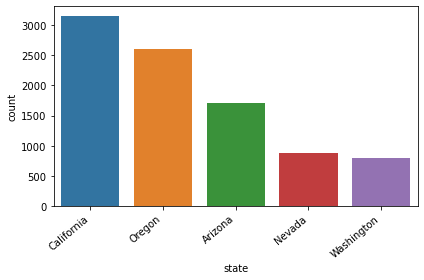

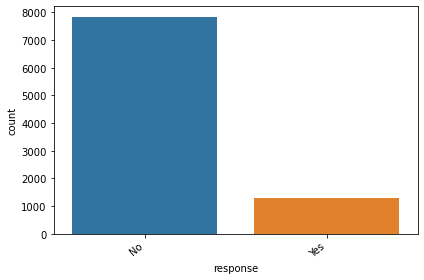

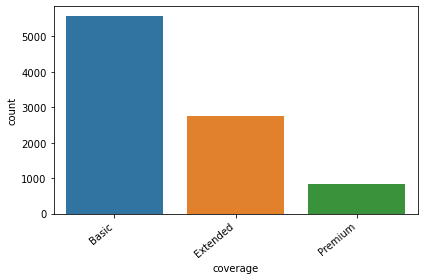

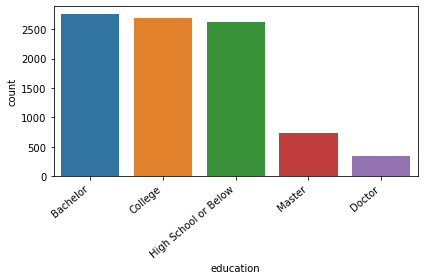

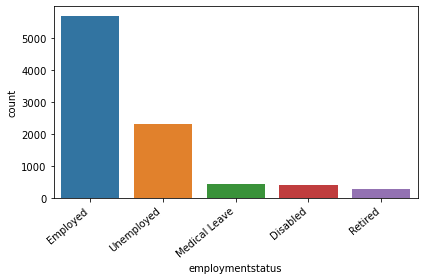

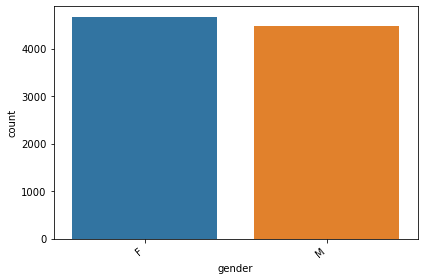

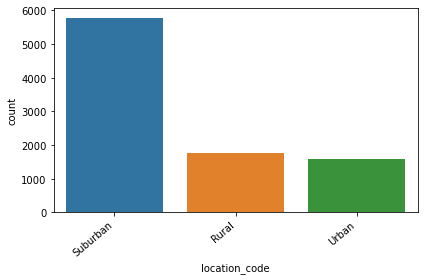

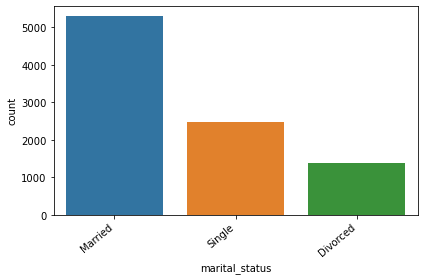

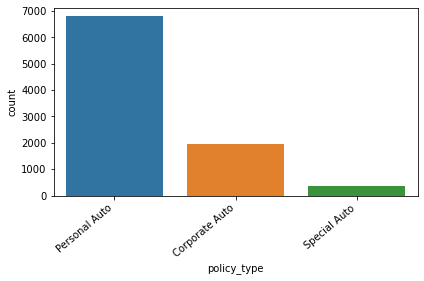

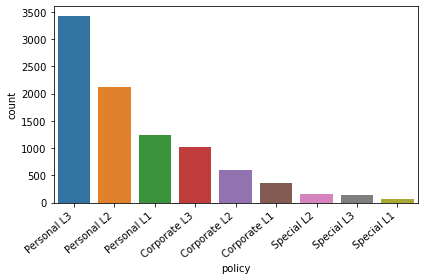

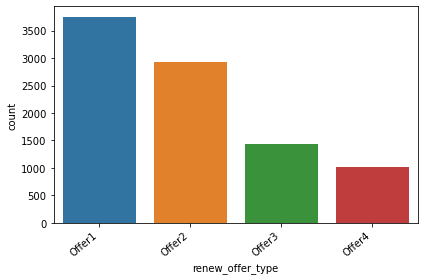

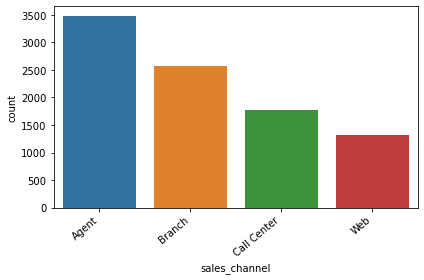

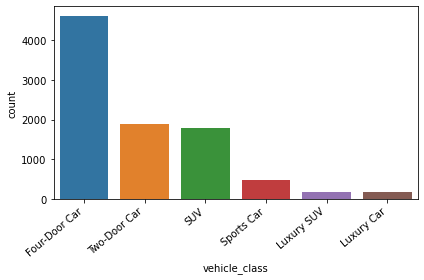

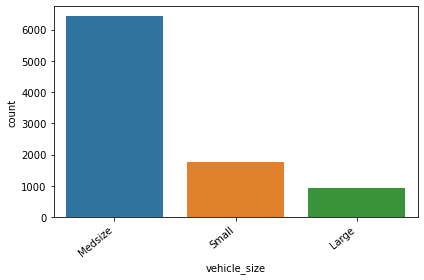

In [14]:
for column in categoricals.drop(columns=['customer', 'effective_to_date'], axis=1):
    ax = sns.countplot(x=categoricals[column], order=categoricals[column].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

In [129]:
# Some values should be consolidated
def clean_coverage(x):
    if x in ['Extended', 'Premium']:
        return 'Non Basic'
    else:
        return x
categoricals.loc[:,'coverage'] = categoricals['coverage'].apply(clean_coverage)
    
def clean_education(x):
    if x in ['Master', 'Doctor']:
        return 'Post-College'
    else:
        return x    
categoricals.loc[:,'education'] = categoricals['education'].apply(clean_education)    
    
def clean_employmentstatus(x):
    if x in ['Medical Leave', 'Disabled', 'Retired']:
        return 'Others'
    else:
        return x 
categoricals.loc[:,'employmentstatus'] = categoricals['employmentstatus'].apply(clean_employmentstatus)    
    
def clean_maritalstatus(x):
    if x in ['Single', 'Divorced']:
        return 'Non Married'
    else:
        return x   
categoricals.loc[:,'marital_status'] = categoricals['marital_status'].apply(clean_maritalstatus)    
    
def clean_policytype(x):
    if x in ['Corporate Auto', 'Special Auto']:
        return 'Non Personal Auto'
    else:
        return x    
categoricals.loc[:,'policy_type'] = categoricals['policy_type'].apply(clean_policytype)    
    
def clean_policy(x):
    if x in ['Personal L1', 'Corporate L1', 'Special L1']:
        return 'L1'
    elif x in ['Personal L2', 'Corporate L2', 'Special L2']:
        return 'L2'
    else:
        return 'L3'  
categoricals.loc[:,'policy'] = categoricals['policy'].apply(clean_policy)    
    
def clean_vehicleclass(x):
    if x in ['Sports Car', 'Luxury Car', 'Luxury SUV']:
        return 'Sports/Luxury'
    else:
        return x       
categoricals.loc[:,'vehicle_class'] = categoricals['vehicle_class'].apply(clean_vehicleclass)    

C:\Users\Ferran\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [123]:
#categoricals['effective_to_date'] = pd.to_datetime(pd.Series(categoricals['effective_to_date']))
categoricals.loc[:,'effective_to_date'] = pd.to_datetime(pd.Series(categoricals.loc[:,'effective_to_date']))

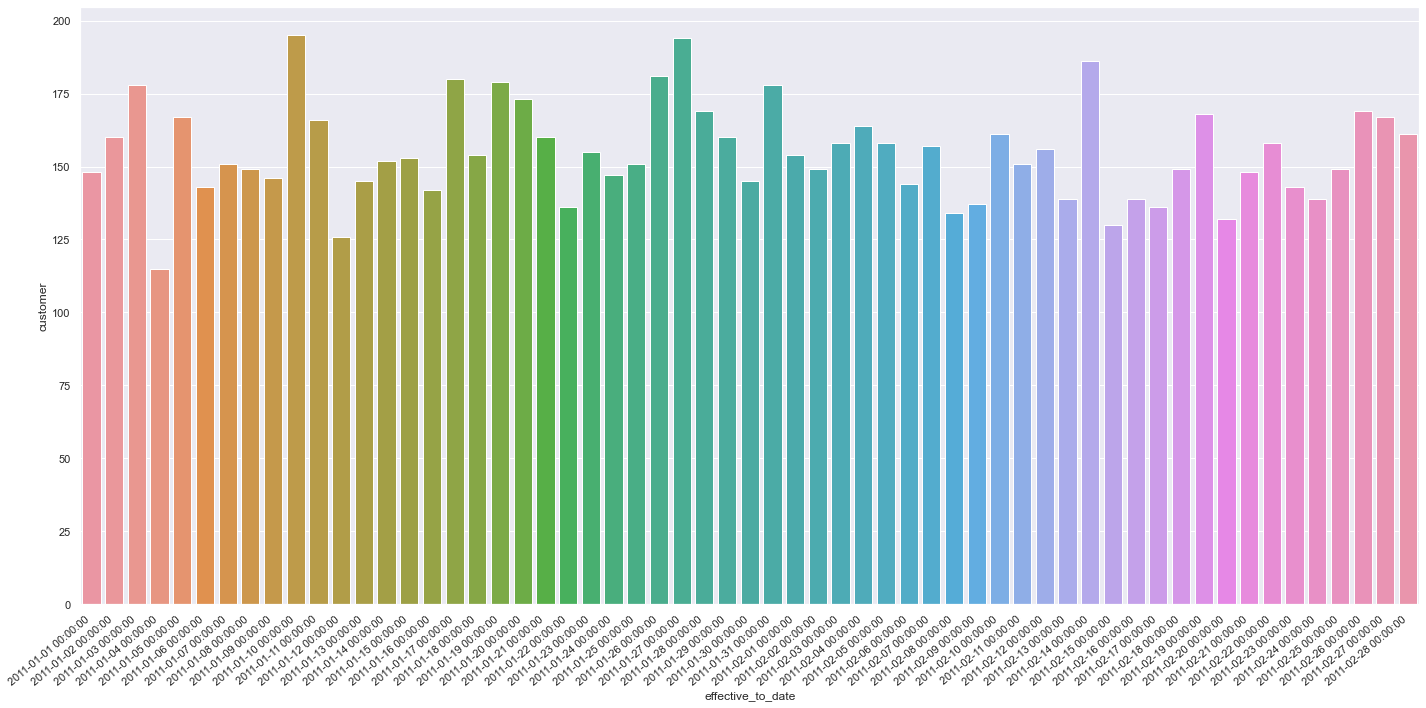

In [126]:
# Here I plot the values grouped by the date
sns.set(rc={"figure.figsize":(20, 10)})
data=categoricals.groupby('effective_to_date')['customer'].count()
ax = sns.barplot(x=data.index, y=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# I can't see any transformation I could do with it.